In [96]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize

In [27]:
def calc_beamsize(k, w0, z):
    w = w0 * ((1 + (2 * z / (k * w0**2))**2)**0.5)
    return w

In [28]:
c = 2.99792458*10**11
f = 230 * 10 **9
lamb = c / f
k = 2 * numpy.pi / lamb
w0 = 13.0369

h = 134.29
spe = 10
waist_rxboard = 70.09
length_1 = 535.3715
length_2 = 653.3715

In [142]:
z = numpy.linspace(0, 700, 10000)
w = calc_beamsize(k, w0, z)
wx_0 = numpy.array(
    [14.768, 14.912, 14.727,
      14.771, 15.03])
wy_0 = numpy.array(
    [14.968,  14.833,
      14.722, 14.69, 14.779])
wx_10 = numpy.array(
    [14.809, 14.995,
      15.021, 14.936
    ])
wy_10 = numpy.array(
    [14.632, 15.274, 15.295,
      15.065, 15.032, 14.957
    ])
wy_20 = numpy.array(
    [15.149, 15.381, 15.155,
      15.319, 15.111, 14.984
    ])
wy_40 = numpy.array(
    [15.492, 15.275, 15.628,
      15.353, 15.506
    ])
wy_length_1 = numpy.array(
    [22.818, 22.877, 23.24,
      23.392, 23.259
    ])
wy_length_2 = numpy.array(
    [26.172, 25.95, 25.561, 25.642
    ])
y = numpy.array(
[h, h+spe, h+spe*2, h+spe*4, 
  length_1, length_2
])
wy = numpy.array(
    [numpy.average(wy_0), numpy.average(wy_10),
      numpy.average(wy_20), numpy.average(wy_40),
      numpy.average(wy_length_1), numpy.average(wy_length_2)
    ])

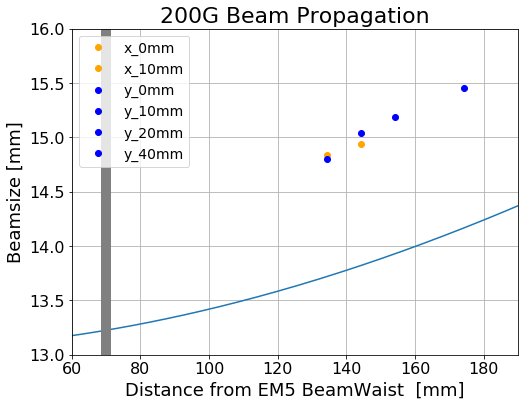

In [141]:
plt.figure(figsize=(8, 6))

plt.plot(z, w)

plt.plot([waist_rxboard, waist_rxboard], [13.0, 16.0], lw=10, color='gray')

plt.plot(h, numpy.average(wx_0), 'bo', label='x_0mm',  color='orange')
# plt.errorbar(h, wx_0, color='orange')

plt.plot(h+spe, numpy.average(wx_10), 'bo', label='x_10mm', color='orange')
# plt.errorbar(h+spe, wx_10, color='orange')

plt.plot(h, numpy.average(wy_0), 'bo', label='y_0mm', color='b')
# plt.errorbar(h, wy_0, color='b')

plt.plot(h+spe, numpy.average(wy_10), 'bo', label='y_10mm', color='b')
# plt.errorbar(h+spe, wy_10, color='b')

plt.plot(h+2*spe, numpy.average(wy_20), 'bo', label='y_20mm', color='b')
# plt.errorbar(h+2*spe, wy_20, color='b')

plt.plot(h+4*spe, numpy.average(wy_40), 'bo', label='y_40mm', color='b')

#plt.plot(length_1, numpy.average(wy_length_1), 'bo', label='y_{}mm'.format(round(length_1, 2)), color='b')
#plt.plot(length_2, numpy.average(wy_length_2),  'bo', label='y_{}mm'.format(round(length_2, 2)), color='b')

plt.grid()
plt.xlabel('Distance from EM5 BeamWaist  [mm]', size=18)
plt.ylabel('Beamsize [mm]', size=18)
plt.title('200G Beam Propagation', size=22)
plt.tick_params(labelsize=16)
plt.xlim(60, 190)
plt.ylim(13, 16)
plt.legend(fontsize=14, loc='upper left')
plt.show()

In [106]:
def fitting_function(param, y, wy):
    wy_ = param[0] * ((1 + (2 * y / (param[1] * param[0]**2))**2)**0.5)
    return wy - wy_

param0 = [13, 2 * numpy.pi / lamb]
param = scipy.optimize.leastsq(fitting_function, param0, args=(y, wy))

def function(y):
    return param[0][0] * ((1 + (2 * y / (param[0][1] * param[0][0]**2))**2)**0.5)

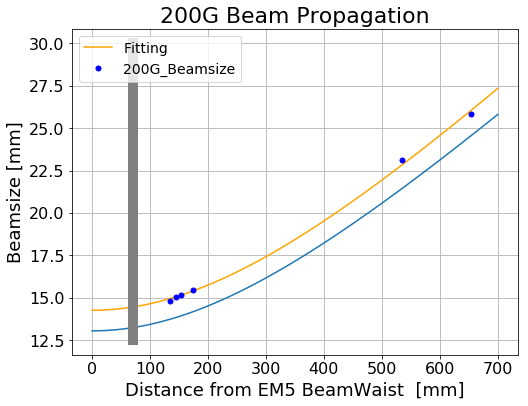

In [154]:
plt.figure(figsize=(8, 6))

plt.plot(z, w)
y_ = numpy.linspace(0, 700, 10000)
plt.plot(y_, function(y_), label='Fitting', color='orange')
plt.plot(y, wy, marker='.', markersize=10, lw=0, label='200G_Beamsize', color='b')
plt.plot([waist_rxboard, waist_rxboard], [12.5, 30], lw=10, color='gray')

plt.grid()
plt.xlabel('Distance from EM5 BeamWaist  [mm]', size=18)
plt.ylabel('Beamsize [mm]', size=18)
plt.title('200G Beam Propagation', size=22)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14, loc='upper left')
plt.show()

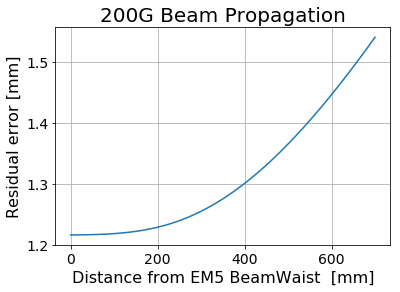

In [155]:
plt.plot(z, function(y_)-w)
plt.grid()
plt.xlabel('Distance from EM5 BeamWaist  [mm]', size=16)
plt.ylabel('Residual error [mm]', size=16)
plt.title('200G Beam Propagation', size=20)
plt.tick_params(labelsize=14)
plt.show()